# FIFA MINI PROJECT

## 1. Background
We are hired by a new club owner to determine which players they should recruite in order to win the next tournament. For this, we decided on ranking players by their market value. 

We will also be creating a model to predict market values based on a number of variables with the assumption that the higher the market value, the stronger the performance of a player is.

We will be doing weekly reports about the progress of our findings and progress.

## 2. Data Gathering / Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For linear regression with numerical variables
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# loading dataframe from csv file
fulldf = pd.read_csv('fifa21_male2.csv')
fulldf.head()

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_94438/2337729049.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fulldf = pd.read_csv('fifa21_male2.csv')


ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [3]:
# Taking a look at the size of our dataframe
print("Number of rows: ", fulldf.shape[0])
print("Number of columns: ", fulldf.shape[1])

Number of rows:  17125
Number of columns:  107


## 3. Data Pre-processing

### 3.1. Cleaning column names

In [4]:
# Checking column names
print(fulldf.columns.tolist()) # list ALL column names for observation

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [5]:
# Create dictionary to replace abbreviations in columns for easier understanding throughout the analysis
new_col_name = {'OVA': 'overall', 
                'BOV': 'best_overall', 
                'BP': 'best_position', 
                'POT': 'potential',
                'FK Accuracy': 'free_kick_acc',
                'W/F': 'weak_foot',
                'SM': 'skill_moves',
                'A/W': 'away_win',
                'D/W': 'duels_won', 
                'IR': 'international_reputation',
                'PAC': 'pace',
                'SHO': 'shooting',
                'PAS': 'passing', 
                'DRI': 'dribbling2',
                'DEF':'defense',
                'PHY':'physicality',
                'LS':'left_stick',
                'ST':'striker',
                'RS':'right_stick',
                'LW':'left_wing',
                'LF':'left_forward',
                'CF':'centre_forward',
                'RF':'right_forward',
                'RW':'right_wing',
                'LAM':'left_attacking_midfielder',
                'CAM':'central_attacking_midfielder',
                'RAM':'right_attacking_midfielder',
                'LCM':'left_centre_midfield',
                'CM':'central_midfielder',
                'RCM':'right_centre_midfield',
                'RM':'right_midfielder',
                'LWB': 'left_wing_back',
                'LDM': 'left_defensive_midfielder',
                'CDM': 'center_defensive_midfielder',
                'RDM': 'right_defensive_midfielder',
                'RWB': 'right_wing_back',
                'LB': 'left_back',
                'LCB' : 'left_center_back',
                'CB' : 'center_back',
                'RCB' : 'right_center_back',
                'RB' : 'right_back',
                'GK': 'goalkeeper',
                'LAM': 'left_attacking_midfield',
                'CAM': 'center_attacking_midfielder', 
                'RAM': 'right_attacking_midfielder', 
                'LM': 'linesman'}
display(new_col_name)

{'OVA': 'overall',
 'BOV': 'best_overall',
 'BP': 'best_position',
 'POT': 'potential',
 'FK Accuracy': 'free_kick_acc',
 'W/F': 'weak_foot',
 'SM': 'skill_moves',
 'A/W': 'away_win',
 'D/W': 'duels_won',
 'IR': 'international_reputation',
 'PAC': 'pace',
 'SHO': 'shooting',
 'PAS': 'passing',
 'DRI': 'dribbling2',
 'DEF': 'defense',
 'PHY': 'physicality',
 'LS': 'left_stick',
 'ST': 'striker',
 'RS': 'right_stick',
 'LW': 'left_wing',
 'LF': 'left_forward',
 'CF': 'centre_forward',
 'RF': 'right_forward',
 'RW': 'right_wing',
 'LAM': 'left_attacking_midfield',
 'CAM': 'center_attacking_midfielder',
 'RAM': 'right_attacking_midfielder',
 'LCM': 'left_centre_midfield',
 'CM': 'central_midfielder',
 'RCM': 'right_centre_midfield',
 'RM': 'right_midfielder',
 'LWB': 'left_wing_back',
 'LDM': 'left_defensive_midfielder',
 'CDM': 'center_defensive_midfielder',
 'RDM': 'right_defensive_midfielder',
 'RWB': 'right_wing_back',
 'LB': 'left_back',
 'LCB': 'left_center_back',
 'CB': 'center_back

In [6]:
# Rename columns
fulldf.rename(columns = new_col_name, inplace=True)
fulldf.head()

ID         Name  Age  overall            Nationality           Club  \
0   2  G. Pasquale   33       69                  Italy        Udinese   
1  16  Luis García   37       71                  Spain      KAS Eupen   
2  27      J. Cole   33       71                England  Coventry City   
3  36     D. Yorke   36       68  Trinidad &amp; Tobago     Sunderland   
4  41      Iniesta   36       81                  Spain    Vissel Kobe   

   best_overall best_position      Position  \
0            71           LWB            LM   
1            70            CM    CM CAM CDM   
2            71           CAM  CAM RM RW LM   
3            70            ST           NaN   
4            82           CAM        CM CAM   

                                        Player Photo  \
0  https://cdn.sofifa.com/players/000/002/16_120.png   
1  https://cdn.sofifa.com/players/000/016/19_120.png   
2  https://cdn.sofifa.com/players/000/027/16_120.png   
3  https://cdn.sofifa.com/players/000/036/09_120.png   
4  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  potential  \
0      https://cdn.sofifa.com/flags/it.png         69   
1      https://cdn.sofifa.com/flags/es.png         71   
2  https://cdn.sofifa.com/flags/gb-eng.png         71   
3      https://cdn.sofifa.com/flags/tt.png         82   
4      https://cdn.sofifa.com/flags/es.png         81   

             Team & Contract Height  Weight   foot  Growth        Joined  \
0        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   Jul 1, 2008   
1      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0  Jul 19, 2014   
2  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   Jan 7, 2016   
3            Sunderland 2009  5'11"  165lbs  Right      14           NaN   
4    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0  Jul 16, 2018   

  Loan Date End  Value  Wage Release Clause     Contract  Attacking  Crossing  \
0           NaN  €625K   €7K             €0  2008 ~ 2016        313        75   
1           NaN  €600K   €7K          €1.1M  2014 ~ 2019        337        68   
2           NaN  €1.1M  €15K             €0  2016 ~ 2020        337        80   
3           NaN     €0    €0             €0         2009        264        54   
4           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021        367        75   

   Finishing  Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  \
0         50                59             71     58.0    338         73   
1         64                61             76     68.0    369         69   
2         64                41             77     75.0    387         79   
3         70                60             80      NaN    255         68   
4         69                54             90     79.0    408         85   

   Curve  free_kick_acc  Long Passing  Ball Control  Movement  Acceleration  \
0   65.0             60            69            71       347            68   
1   79.0             79            71            71       305            56   
2   84.0             77            69            78       295            48   
3    NaN             46            64            77       176            59   
4   80.0             70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4       

In [7]:
# Standardize column names (lowercase, replace spaces with underscore)
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in fulldf.columns]
standard_cols(fulldf)
fulldf.head()

id         name  age  overall            nationality           club  \
0   2  G. Pasquale   33       69                  Italy        Udinese   
1  16  Luis García   37       71                  Spain      KAS Eupen   
2  27      J. Cole   33       71                England  Coventry City   
3  36     D. Yorke   36       68  Trinidad &amp; Tobago     Sunderland   
4  41      Iniesta   36       81                  Spain    Vissel Kobe   

   best_overall best_position      position  \
0            71           LWB            LM   
1            70            CM    CM CAM CDM   
2            71           CAM  CAM RM RW LM   
3            70            ST           NaN   
4            82           CAM        CM CAM   

                                        player_photo  \
0  https://cdn.sofifa.com/players/000/002/16_120.png   
1  https://cdn.sofifa.com/players/000/016/19_120.png   
2  https://cdn.sofifa.com/players/000/027/16_120.png   
3  https://cdn.sofifa.com/players/000/036/09_120.png   
4  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  potential  \
0      https://cdn.sofifa.com/flags/it.png         69   
1      https://cdn.sofifa.com/flags/es.png         71   
2  https://cdn.sofifa.com/flags/gb-eng.png         71   
3      https://cdn.sofifa.com/flags/tt.png         82   
4      https://cdn.sofifa.com/flags/es.png         81   

             team_&_contract height  weight   foot  growth        joined  \
0        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   Jul 1, 2008   
1      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0  Jul 19, 2014   
2  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   Jan 7, 2016   
3            Sunderland 2009  5'11"  165lbs  Right      14           NaN   
4    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0  Jul 16, 2018   

  loan_date_end  value  wage release_clause     contract  attacking  crossing  \
0           NaN  €625K   €7K             €0  2008 ~ 2016        313        75   
1           NaN  €600K   €7K          €1.1M  2014 ~ 2019        337        68   
2           NaN  €1.1M  €15K             €0  2016 ~ 2020        337        80   
3           NaN     €0    €0             €0         2009        264        54   
4           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021        367        75   

   finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
0         50                59             71     58.0    338         73   
1         64                61             76     68.0    369         69   
2         64                41             77     75.0    387         79   
3         70                60             80      NaN    255         68   
4         69                54             90     79.0    408         85   

   curve  free_kick_acc  long_passing  ball_control  movement  acceleration  \
0   65.0             60            69            71       347            68   
1   79.0             79            71            71       305            56   
2   84.0             77            69            78       295            48   
3    NaN             46            64            77       176            59   
4   80.0             70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4       

In [8]:
# Double check cols
print(fulldf.columns.tolist())

['id', 'name', 'age', 'overall', 'nationality', 'club', 'best_overall', 'best_position', 'position', 'player_photo', 'club_logo', 'flag_photo', 'potential', 'team_&_contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'free_kick_acc', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'weak_foot', 'skill_moves', 'away_win', 'duels_won', 'international_reputation', 'pace', 'shooting', 'passing', 'dribblin

### 3.2. Observing some variables

In [9]:
fulldf.gender.unique() # all players are male so we can drop this column

array(['Male'], dtype=object)

In [10]:
# We noticed 2 dribbling columns and wanted to check if they are the same
fulldf[["dribbling", "dribbling2"]].head(10)

dribbling  dribbling2
0         73          71
1         69          69
2         79          77
3         68          69
4         85          85
5         67          67
6         77          77
7         77          77
8         44          53
9         75          79

In [11]:
len(fulldf[fulldf.dribbling != fulldf.dribbling2]) # columns are not equal

14347

In [12]:
# Checking df info for nulls, dtypes
fulldf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    id                           17125 non-null  int64  
 1    name                         17125 non-null  object 
 2    age                          17125 non-null  int64  
 3    overall                      17125 non-null  int64  
 4    nationality                  17125 non-null  object 
 5    club                         17102 non-null  object 
 6    best_overall                 17125 non-null  int64  
 7    best_position                17125 non-null  object 
 8    position                     16712 non-null  object 
 9    player_photo                 17125 non-null  object 
 10   club_logo                    17102 non-null  object 
 11   flag_photo                   17125 non-null  object 
 12   potential                    17125 non-null  int64  
 13  

Anomalies detected above:
1. Following date columns are considered objects instead of numbers:
    - height
    - weight
    - value
    - wage
    - release clause

    <br/>
2. Following date columns are considered objects intead of datetime
    - joined
    - loan_date_end
    - contract (year, duration)
    
    <br/>
3. Ratings are considered objects because values have a star symbol in the cell:
    - weak foot
    - skill moves
    - international rating
    
    <br/>
4. 1st columns drop: Following columns will be dropped:
    - columns 79 to 105 which consist of values with + sign. These columns are stats of each player for each position.
    - all images columns: player_photo, club_logo, flag_photo
    - gender: all are male

In [13]:
# new df with columns 79 to 106 dropped
df = fulldf.iloc[:, :79]
df.head()

id         name  age  overall            nationality           club  \
0   2  G. Pasquale   33       69                  Italy        Udinese   
1  16  Luis García   37       71                  Spain      KAS Eupen   
2  27      J. Cole   33       71                England  Coventry City   
3  36     D. Yorke   36       68  Trinidad &amp; Tobago     Sunderland   
4  41      Iniesta   36       81                  Spain    Vissel Kobe   

   best_overall best_position      position  \
0            71           LWB            LM   
1            70            CM    CM CAM CDM   
2            71           CAM  CAM RM RW LM   
3            70            ST           NaN   
4            82           CAM        CM CAM   

                                        player_photo  \
0  https://cdn.sofifa.com/players/000/002/16_120.png   
1  https://cdn.sofifa.com/players/000/016/19_120.png   
2  https://cdn.sofifa.com/players/000/027/16_120.png   
3  https://cdn.sofifa.com/players/000/036/09_120.png   
4  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  potential  \
0      https://cdn.sofifa.com/flags/it.png         69   
1      https://cdn.sofifa.com/flags/es.png         71   
2  https://cdn.sofifa.com/flags/gb-eng.png         71   
3      https://cdn.sofifa.com/flags/tt.png         82   
4      https://cdn.sofifa.com/flags/es.png         81   

             team_&_contract height  weight   foot  growth        joined  \
0        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   Jul 1, 2008   
1      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0  Jul 19, 2014   
2  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   Jan 7, 2016   
3            Sunderland 2009  5'11"  165lbs  Right      14           NaN   
4    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0  Jul 16, 2018   

  loan_date_end  value  wage release_clause     contract  attacking  crossing  \
0           NaN  €625K   €7K             €0  2008 ~ 2016        313        75   
1           NaN  €600K   €7K          €1.1M  2014 ~ 2019        337        68   
2           NaN  €1.1M  €15K             €0  2016 ~ 2020        337        80   
3           NaN     €0    €0             €0         2009        264        54   
4           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021        367        75   

   finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
0         50                59             71     58.0    338         73   
1         64                61             76     68.0    369         69   
2         64                41             77     75.0    387         79   
3         70                60             80      NaN    255         68   
4         69                54             90     79.0    408         85   

   curve  free_kick_acc  long_passing  ball_control  movement  acceleration  \
0   65.0             60            69            71       347            68   
1   79.0             79            71            71       305            56   
2   84.0             77            69            78       295            48   
3    NaN             46            64            77       176            59   
4   80.0             70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4       

In [14]:
image = ['player_photo', 'club_logo', 'flag_photo']
df.drop(columns= image, axis=1, inplace=True)
df.head()

id         name  age  overall            nationality           club  \
0   2  G. Pasquale   33       69                  Italy        Udinese   
1  16  Luis García   37       71                  Spain      KAS Eupen   
2  27      J. Cole   33       71                England  Coventry City   
3  36     D. Yorke   36       68  Trinidad &amp; Tobago     Sunderland   
4  41      Iniesta   36       81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential  \
0            71           LWB            LM         69   
1            70            CM    CM CAM CDM         71   
2            71           CAM  CAM RM RW LM         71   
3            70            ST           NaN         82   
4            82           CAM        CM CAM         81   

             team_&_contract height  weight   foot  growth        joined  \
0        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   Jul 1, 2008   
1      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0  Jul 19, 2014   
2  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   Jan 7, 2016   
3            Sunderland 2009  5'11"  165lbs  Right      14           NaN   
4    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0  Jul 16, 2018   

  loan_date_end  value  wage release_clause     contract  attacking  crossing  \
0           NaN  €625K   €7K             €0  2008 ~ 2016        313        75   
1           NaN  €600K   €7K          €1.1M  2014 ~ 2019        337        68   
2           NaN  €1.1M  €15K             €0  2016 ~ 2020        337        80   
3           NaN     €0    €0             €0         2009        264        54   
4           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021        367        75   

   finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
0         50                59             71     58.0    338         73   
1         64                61             76     68.0    369         69   
2         64                41             77     75.0    387         79   
3         70                60             80      NaN    255         68   
4         69                54             90     79.0    408         85   

   curve  free_kick_acc  long_passing  ball_control  movement  acceleration  \
0   65.0             60            69            71       347            68   
1   79.0             79            71            71       305            56   
2   84.0             77            69            78       295            48   
3    NaN             46            64            77       176            59   
4   80.0             70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long_shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69.0   
1       64        60          71        362          71           71.0   
2       29        56          69        317          69           39.0   
3       51        66          59        271          59           70.0   
4       58        62          70        370          58           70.0   

   positioning  vision  penalties  composure  defending  marking  \
0         63.0    66.0         50        NaN        208       70   
1         72.0    73.0         75       79.0        153       70   
2         69.0    74.0         66        NaN         99       35   
3         72.0     NaN         70        NaN         75       34   
4         78.0    93.0         71       89.0        181       68   

   standing_tackle  sl

In [15]:
# new df0 shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  17125
Number of columns:  76


#### Check for duplicates and missing values

In [16]:
# Checking for missing values
df.isna().sum()

id                              0
name                            0
age                             0
overall                         0
nationality                     0
club                           23
best_overall                    0
best_position                   0
position                      413
potential                       0
team_&_contract                 0
height                          0
weight                          0
foot                            0
growth                          0
joined                         58
loan_date_end               16215
value                           0
wage                            0
release_clause                  0
contract                        0
attacking                       0
crossing                        0
finishing                       0
heading_accuracy                0
short_passing                   0
volleys                        58
skill                           0
dribbling                       0
curve         

In [17]:
df.duplicated().sum()

0

No duplicates were found. There are missing values but we will deal with them after cleaning the dataset.

### 3.3. Creating subsets and Data Cleaning


We are creating 3 subsets from the full data set so each team member can analyze a group of variables. We will be keeping the player id column in each subset for merging purposes later on.

#### df1_full= **EA Sports FIFA 19 Game**
- Player id
- Player Name
- Club of the Player
- Best Position
- Best Overall
- Position
- Overall
- Pace
- Shooting
- Passing
- Dribbling
- Defending
- Physical
- Hits

In [18]:
df1_full = df[['id', 'name', 'club', 'best_position', 'best_overall', 'position', 'overall', 'pace', 'shooting',
               'passing', 'dribbling2','defense', 'physicality','hits']]
df1_full.head()

id         name           club best_position  best_overall      position  \
0   2  G. Pasquale        Udinese           LWB            71            LM   
1  16  Luis García      KAS Eupen            CM            70    CM CAM CDM   
2  27      J. Cole  Coventry City           CAM            71  CAM RM RW LM   
3  36     D. Yorke     Sunderland            ST            70           NaN   
4  41      Iniesta    Vissel Kobe           CAM            82        CM CAM   

   overall  pace  shooting  passing  dribbling2  defense  physicality hits  
0       69    71        59       70          71       68           69    4  
1       71    53        69       73          69       58           63    4  
2       71    45        68       76          77       36           52   11  
3       68    61        66       66          69       47           60    3  
4       81    58        70       85          85       63           59  149

In [19]:
df1_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             17125 non-null  int64 
 1   name           17125 non-null  object
 2   club           17102 non-null  object
 3   best_position  17125 non-null  object
 4   best_overall   17125 non-null  int64 
 5   position       16712 non-null  object
 6   overall        17125 non-null  int64 
 7   pace           17125 non-null  int64 
 8   shooting       17125 non-null  int64 
 9   passing        17125 non-null  int64 
 10  dribbling2     17125 non-null  int64 
 11  defense        17125 non-null  int64 
 12  physicality    17125 non-null  int64 
 13  hits           17125 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.8+ MB


We observed that the hits column is considered as an object so it needs to be cleaned.

In [20]:
# replacing K in hits column with 000 to create values in thousands and convert it to float
df1_full['hits'] = df1_full['hits'].str.replace('K', '000', regex=True).astype(float)

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_94438/2007308317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_full['hits'] = df1_full['hits'].str.replace('K', '000', regex=True).astype(float)


In [21]:
df1_full.hits.sample(10)

3538     26.0
16260     6.0
11665    12.0
13368     1.5
6206      6.0
196       3.0
11526     6.0
11791     6.0
9157      5.0
2997      4.0
Name: hits, dtype: float64

After cleaning the first subset, we decided to keep the following variables for predicting market value:

In [22]:
df1 = df1_full[['id', 'name', 'club', 'best_position', 'best_overall', 'pace', 'shooting', 'passing', 'dribbling2', 'defense', 'physicality', 'hits']]
df1.head()

id         name           club best_position  best_overall  pace  shooting  \
0   2  G. Pasquale        Udinese           LWB            71    71        59   
1  16  Luis García      KAS Eupen            CM            70    53        69   
2  27      J. Cole  Coventry City           CAM            71    45        68   
3  36     D. Yorke     Sunderland            ST            70    61        66   
4  41      Iniesta    Vissel Kobe           CAM            82    58        70   

   passing  dribbling2  defense  physicality   hits  
0       70          71       68           69    4.0  
1       73          69       58           63    4.0  
2       76          77       36           52   11.0  
3       66          69       47           60    3.0  
4       85          85       63           59  149.0

In [23]:
df1.dtypes

id                 int64
name              object
club              object
best_position     object
best_overall       int64
pace               int64
shooting           int64
passing            int64
dribbling2         int64
defense            int64
physicality        int64
hits             float64
dtype: object

#### df2_full = Transfermarkt and extra info by player
- Player id
- Age
- Nationality
- Height
- Foot
- Day Joined the current club
- Day of Contract End
- Market Value of the Player

In [24]:
df2_full = df[['id', 'age', 'nationality',  'team_&_contract', 'height', 'weight', 'foot', 'weak_foot', 'skill_moves',
               'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract',  'potential','away_win',
               'duels_won', 'international_reputation']]
df2_full.head()

id  age            nationality            team_&_contract height  weight  \
0   2   33                  Italy        Udinese 2008 ~ 2016   6'0"  181lbs   
1  16   37                  Spain      KAS Eupen 2014 ~ 2019  5'10"  143lbs   
2  27   33                England  Coventry City 2016 ~ 2020   5'9"  161lbs   
3  36   36  Trinidad &amp; Tobago            Sunderland 2009  5'11"  165lbs   
4  41   36                  Spain    Vissel Kobe 2018 ~ 2021   5'7"  150lbs   

    foot weak_foot skill_moves        joined loan_date_end  value  wage  \
0   Left       3 ★          2★   Jul 1, 2008           NaN  €625K   €7K   
1  Right       4 ★          3★  Jul 19, 2014           NaN  €600K   €7K   
2  Right       4 ★          4★   Jan 7, 2016           NaN  €1.1M  €15K   
3  Right       3 ★          1★           NaN           NaN     €0    €0   
4  Right       4 ★          4★  Jul 16, 2018           NaN  €5.5M  €12K   

  release_clause     contract  potential away_win duels_won  \
0             €0  2008 ~ 2016         69   Medium      High   
1          €1.1M  2014 ~ 2019         71   Medium    Medium   
2             €0  2016 ~ 2020         71   Medium       Low   
3             €0         2009         82      NaN       NaN   
4          €7.2M  2018 ~ 2021         81     High    Medium   

  international_reputation  
0                      2 ★  
1                      1 ★  
2                      2 ★  
3                      1 ★  
4                      4 ★

In [25]:
df2_full.dtypes

id                           int64
age                          int64
nationality                 object
team_&_contract             object
height                      object
weight                      object
foot                        object
weak_foot                   object
skill_moves                 object
joined                      object
loan_date_end               object
value                       object
wage                        object
release_clause              object
contract                    object
potential                    int64
away_win                    object
duels_won                   object
international_reputation    object
dtype: object

We can see several columns need to be cleaned in this subset such as:
1. Replacing values in the following columns:
    - **nationality :** "&amp;" to "and"
    - **height :** convert from inches to cm, rename column to height_cm, then change column type to number
    - **weight :** could also be converted from pounds to kg, remove lbs and change column name to weight_kg, then change column type to number
    - **weak_foot, skill_moves, and international_reputation :** delete star symbol transform columns to integer
    - **joined and loan_date_end :** transform to datetime format
    - **contract :** separate start and end of contract to 2 columns
    - **value and wage :** remove € signs, replace K to thousands value, M to millions value, transform columns to float
2. Delete columns:
    - **team & contract :** we already have the club and contract columns which provide the same information

#### **_For lack of time, we will not clean all columns but focus only on the variables we will be keeping for the model:_**

In [26]:
# Selected columns
df2 = df2_full[['id', 'age', 'nationality', 'wage', 'potential', 'value']]
df2.head()

id  age            nationality  wage  potential  value
0   2   33                  Italy   €7K         69  €625K
1  16   37                  Spain   €7K         71  €600K
2  27   33                England  €15K         71  €1.1M
3  36   36  Trinidad &amp; Tobago    €0         82     €0
4  41   36                  Spain  €12K         81  €5.5M

#### Clean wage column

In [27]:
# remove euro sign, replace K to 000, then convert to float dtype
df2['wage'] = df2['wage'].str.replace('€', '', regex=True).replace('K', '000', regex=True).astype(float) 

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_94438/3073949810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wage'] = df2['wage'].str.replace('€', '', regex=True).replace('K', '000', regex=True).astype(float)


In [28]:
# check
df2.wage.head()

0     7000.0
1     7000.0
2    15000.0
3        0.0
4    12000.0
Name: wage, dtype: float64

In [29]:
df2.wage.sort_values(ascending=False)

752      560000.0
2871     370000.0
1800     350000.0
946      350000.0
1753     310000.0
3630     310000.0
662      300000.0
681      300000.0
3102     290000.0
4049     270000.0
2650     270000.0
1411     260000.0
2790     260000.0
5109     250000.0
5030     250000.0
2745     250000.0
2435     240000.0
2287     240000.0
4462     230000.0
6605     230000.0
643      220000.0
142      220000.0
2398     220000.0
3961     220000.0
1632     220000.0
3875     220000.0
3251     210000.0
4366     210000.0
4166     210000.0
366      200000.0
5642     200000.0
5256     195000.0
5633     195000.0
6844     190000.0
6333     190000.0
2385     190000.0
3914     190000.0
8489     190000.0
5425     190000.0
3171     190000.0
3524     175000.0
9258     175000.0
2290     170000.0
4586     170000.0
1382     170000.0
2264     170000.0
5012     165000.0
2802     165000.0
3619     165000.0
1892     160000.0
1453     160000.0
5046     160000.0
2142     160000.0
9331     160000.0
104      160000.0
6922     1

#### Clean value column

In [30]:
# remove € sign
df2['value'] = df2['value'].str.replace('€', '', regex=True)

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_94438/1115926971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['value'] = df2['value'].str.replace('€', '', regex=True)


In [31]:
# function to clean the value column
def clean_value(x):
    if x.endswith('M'):
        return float(x.replace('M', '')) * 1000000
    elif x.endswith('K'):
        return float(x.replace('K', '')) * 1000
    else:
        return float(x)

In [32]:
# apply function and check
df2['value'] = df2['value'].apply(clean_value)
df2['value'].head()

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_94438/877536350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['value'] = df2['value'].apply(clean_value)


0     625000.0
1     600000.0
2    1100000.0
3          0.0
4    5500000.0
Name: value, dtype: float64

In [33]:
df2.value.sort_values(ascending=False)

9331     105500000.0
2650      90000000.0
2871      87000000.0
2287      80000000.0
5030      78000000.0
5109      78000000.0
4166      75500000.0
3665      75000000.0
4049      72500000.0
3961      71000000.0
5425      71000000.0
2790      69500000.0
9633      69500000.0
752       67500000.0
5736      65000000.0
5633      63000000.0
5777      62500000.0
6605      60000000.0
9212      60000000.0
3630      59500000.0
1800      58000000.0
10354     57000000.0
5642      56000000.0
2745      56000000.0
1753      55000000.0
5136      54500000.0
5256      53500000.0
9317      53000000.0
6387      53000000.0
946       53000000.0
662       53000000.0
3619      52500000.0
3914      52000000.0
7226      51500000.0
6333      51000000.0
3102      50500000.0
8489      50500000.0
3171      50000000.0
3771      50000000.0
3519      50000000.0
10212     49500000.0
5627      49500000.0
7499      49000000.0
2787      48500000.0
4035      48500000.0
4680      47500000.0
3875      46500000.0
142       460

#### Clean nationality column

In [34]:
df2['nationality'] = df2['nationality'].str.replace('&amp;', 'and') # replace '&amp;' to 'and'
df2[df2.nationality.str.contains('\sand\s')] #check all values containing 'and'

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_94438/1677211945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nationality'] = df2['nationality'].str.replace('&amp;', 'and') # replace '&amp;' to 'and'


id  age            nationality     wage  potential      value
3          36   36    Trinidad and Tobago      0.0         82        0.0
697    156166   30    Antigua and Barbuda   5000.0         65   500000.0
769    158525   32    Trinidad and Tobago   3000.0         66   525000.0
2801   192495   28  Saint Kitts and Nevis  59000.0         73  4000000.0
3269   197930   29    Antigua and Barbuda   3000.0         61   250000.0
4538   205425   33  São Tomé and Príncipe  13000.0         70  1100000.0
5578   211966   24    Antigua and Barbuda   8000.0         76  2800000.0
5834   213156   24    Antigua and Barbuda   2000.0         66   325000.0
6558   217852   30    Trinidad and Tobago   6000.0         71  2200000.0
8065   226203   28    Trinidad and Tobago   7000.0         72  3100000.0
8598   229153   22    Trinidad and Tobago    500.0         75  1400000.0
10352  235773   22    Antigua and Barbuda   2000.0         72   500000.0
10368  235830   22    Antigua and Barbuda   2000.0         61    80000.0
13998  247448   26    Trinidad and Tobago    950.0         55    45000.0
14335  250740   18    Antigua and Barbuda    600.0         70   100000.0

#### df3_full = Player Stats
1. **ATTACKING**
- Crossing
- Finishing
- Heading Accuracy
- Short Passing
- Volleys

2. **SKILL**
- Dribbling
- Curve
- FK Accuracy
- Long Passing
- Ball Control

3. **MOVEMENT**

- Acceleration
- Sprint Speed
- Agility
- Reactions
- Balance

4. **POWER**
- Shot Power
- Jumping
- Stamina
- Strength
- Long Shots

5. **MENTALITY**
- Aggression
- Interceptions
- Positioning
- Vision
- Penalties
- Composure

6. **DEFENDING**
- Defensive Awareness
- Standing Tackle
- Sliding Tackle

7. **GOALKEEPING**
- GK Diving
- GK Handling
- GK Kicking
- GK Positioning
- GK Reflexes

8. Growth
9. Base Stats
10. Total Stats

Using the sofifa ressource, we know that there are 7 main categories containing several subcategories. Therefore, the following steps would consist of:
   1. Creating the subset containing player stats and growth column
   2. Checking for dtypes (expecting to only have numbers)
   3. Observing certain variables like growth and base stats to try and find out what they signify
   4. Checking if subcategories add up to the same values in the main categories
   5. Checking if the sum of main category values is equal to the total_stats column

#### Creating the subset containing player stats and growth column
  

In [35]:
# list of columns for df3
cols_df3 = ['id', 'growth', 'base_stats', 'total_stats',
            'attacking', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys',
            'skill', 'dribbling', 'curve', 'free_kick_acc', 'long_passing', 'ball_control',
            'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
            'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
            'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure',
            'defending', 'marking', 'standing_tackle', 'sliding_tackle',
            'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

In [36]:
# create subset
df3_full = df[cols_df3]
df3_full.head()

id  growth  base_stats  total_stats  attacking  crossing  finishing  \
0   2       0         408         1929        313        75         50   
1  16       0         385         1906        337        68         64   
2  27       0         354         1770        337        80         64   
3  36      14         369         1348        264        54         70   
4  41       0         420         2014        367        75         69   

   heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   free_kick_acc  long_passing  ball_control  movement  acceleration  \
0             60            69            71       347            68   
1             79            71            71       305            56   
2             77            69            78       295            48   
3             46            64            77       176            59   
4             70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long_shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69.0   
1       64        60          71        362          71           71.0   
2       29        56          69        317          69           39.0   
3       51        66          59        271          59           70.0   
4       58        62          70        370          58           70.0   

   positioning  vision  penalties  composure  defending  marking  \
0         63.0    66.0         50        NaN        208       70   
1         72.0    73.0         75       79.0        153       70   
2         69.0    74.0         66        NaN         99       35   
3         72.0     NaN         70        NaN         75       34   
4         78.0    93.0         71       89.0        181       68   

   standing_tackle  sliding_tackle  goalkeeping  gk_diving  gk_handling  \
0               69            69.0           56         14            5   
1               43            40.0           56          9           12   
2               34            30.0           51          9            6   
3               41             NaN           68          5           21   
4               57            56.0           45          6           13   

   gk_kicking  gk_positioning  gk_reflexes  
0          15              10           12  
1          13              11           11  
2          13              16            7  
3          64              21           21  
4           6              13            7

In [37]:
df3_full.shape

(17125, 45)

#### Checking for dtypes (expecting to only have numbers)

In [38]:
df3_full.dtypes.value_counts() #correct assumption

int64      35
float64    10
dtype: int64

####  Observing certain variables like growth and base stats to try and find out what they signify

Create new subsets for the next exploration.

In [39]:
# subset main category stats
main_category = ['attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']
main_cat = df3_full[main_category]

# subcategories
attack = df3_full[['crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys']]
skill = df3_full[['dribbling', 'curve', 'free_kick_acc', 'long_passing', 'ball_control']]
movement = df3_full[['acceleration', 'sprint_speed', 'agility', 'reactions', 'balance']]
power = df3_full[['shot_power', 'jumping', 'stamina', 'strength', 'long_shots']]
mentality = df3_full[['aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure']]
defense = df3_full[['marking', 'standing_tackle', 'sliding_tackle']]
goal= df3_full[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]

# list of all new subcategory df
subcategory = [attack, skill, movement, power, mentality, defense, goal]

In [40]:
df3_full.growth.unique()

array([ 0, 14,  4,  6,  3, 21, 17,  8, 12,  7,  2, 11,  5, 13,  9, 18, 10,
        1, -1, 16, 20, 19, 15, 23, 22, 25, 24, 26])

In [41]:
df3_full[['growth','base_stats', 'total_stats']].head()

growth  base_stats  total_stats
0       0         408         1929
1       0         385         1906
2       0         354         1770
3      14         369         1348
4       0         420         2014

In [42]:
main_cat.head()

attacking  skill  movement  power  mentality  defending  goalkeeping
0        313    338       347    347        320        208           56
1        337    369       305    324        362        153           56
2        337    387       295    284        317         99           51
3        264    255       176    239        271         75           68
4        367    408       346    297        370        181           45

In [43]:
main_cat.mean(axis=1).head() # wanted to see if base_stats is the average but it is NOT

0    275.571429
1    272.285714
2    252.857143
3    192.571429
4    287.714286
dtype: float64

After quickly looking at both growth and base_stats columns, we still don't know what they mean so we will drop them.

#### Checking if subcategories add up to the same values in the main categories

In [44]:
# create a function to check
def check_equality(main, i, sub_sum):
    '''This function can be used to check if the sum of the values in the stats subcategories are equal to the value
    in the main category column.
    main = the column pertaining to a main category being compared
    i = index position
    sub_sum = the sum of all columns considered a subcategory of the main
    result = count of True (values are equal) and False (values are not equal)'''
    
    main = main.iloc[:, i]
    sub_sum = sub_sum[i].sum(axis=1)
    result = (main == sub_sum).value_counts()  
    return result

In [45]:
# append to list and transform to dataframe
sum_check = []
    
for i in range(7):
    sum_check.append(check_equality(main_cat,i, subcategory))

In [46]:
def create_dfcheck(var):
    dfcheck = pd.DataFrame(var).T
    dfcheck.columns = main_cat.columns
    dfcheck.fillna(0,inplace=True)
    return dfcheck

In [47]:
df_check = create_dfcheck(sum_check)
df_check

attacking    skill  movement    power  mentality  defending  \
True     17125.0  17125.0   17125.0  17125.0      423.0    17125.0   
False        0.0      0.0       0.0      0.0    16702.0        0.0   

       goalkeeping  
True       17067.0  
False         58.0

In [48]:
# checking for null values in the subcategories
nulls = df3_full.isna().sum()
print(nulls[nulls > 0])

volleys            58
curve              58
agility            58
balance            58
jumping            58
interceptions       7
positioning         7
vision             58
composure         423
sliding_tackle     58
dtype: int64


5 out of the 7 main categories are equal to the sum of their subcategories, with the exception of mentality and goalkeeping. 
For mentality, this could be a result of several missing values in the subcategories. For this reason and for lack of time to delve deeper, we will drop the subcategories and keep the main ones, assuming they are the same.

#### Checking if the sum of main category values is equal to the total_stats column

In [49]:
(df.total_stats == main_cat.sum(axis=1)).value_counts()

True    17125
dtype: int64

totat_stats column is the sum of values in the main categories.

In [50]:
# subsetting to the columns we decided to keep
cols_to_keep = ['id', 'total_stats', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']
df3 = df3_full[cols_to_keep]
df3.head()

id  total_stats  attacking  skill  movement  power  mentality  defending  \
0   2         1929        313    338       347    347        320        208   
1  16         1906        337    369       305    324        362        153   
2  27         1770        337    387       295    284        317         99   
3  36         1348        264    255       176    239        271         75   
4  41         2014        367    408       346    297        370        181   

   goalkeeping  
0           56  
1           56  
2           51  
3           68  
4           45

In [51]:
# checking for nulls... and we're good 👍
df3.isna().sum()

id             0
total_stats    0
attacking      0
skill          0
movement       0
power          0
mentality      0
defending      0
goalkeeping    0
dtype: int64

### 3.4. Merging all three subsets

In [52]:
# Joining the subsets into one df
df_all = df1.merge(df2, on ='id').merge(df3, on = 'id')
df_all.head()

#copy
dfall = df_all.copy()

In [53]:
df_all.isna().sum()

id                 0
name               0
club              23
best_position      0
best_overall       0
pace               0
shooting           0
passing            0
dribbling2         0
defense            0
physicality        0
hits             741
age                0
nationality        0
wage               0
potential          0
value              0
total_stats        0
attacking          0
skill              0
movement           0
power              0
mentality          0
defending          0
goalkeeping        0
dtype: int64

In [54]:
# since we have a lot of records, we decided to simply drop the nulls
df_all = df_all.dropna()

In [55]:
df_all.shape

(16362, 25)

In [56]:
# also check for duplicates, just in case
df_all.duplicated().sum()

0

In [57]:
df_all = df_all[(df_all.wage != 0) & (df_all.value != 0)]
df_all.shape

(15930, 25)

## 3. Exploratory Data Analysis

#### Checking outliers in wage and value

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wage'>

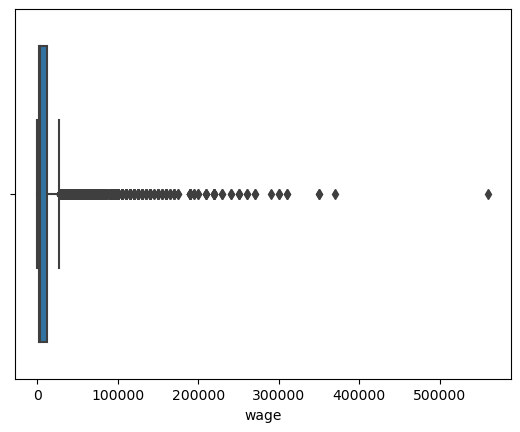

In [67]:
sns.boxplot(num_new.wage)

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value'>

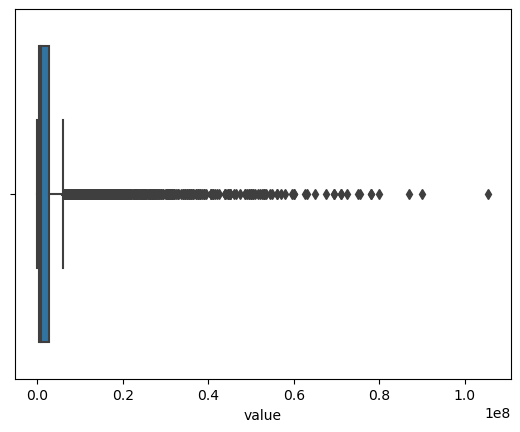

In [68]:
sns.boxplot(num_new.value)

As we are very interested in the highest market value, it would not make sense to eliminate these values which are considered outliers.

### Numerical Categories

In [59]:
num = df_all.select_dtypes(np.number)
num.head()

id  best_overall  pace  shooting  passing  dribbling2  defense  \
0   2            71    71        59       70          71       68   
1  16            70    53        69       73          69       58   
2  27            71    45        68       76          77       36   
4  41            82    58        70       85          85       63   
5  61            66    91        56       56          67       27   

   physicality   hits  age     wage  potential      value  total_stats  \
0           69    4.0   33   7000.0         69   625000.0         1929   
1           63    4.0   37   7000.0         71   600000.0         1906   
2           52   11.0   33  15000.0         71  1100000.0         1770   
4           59  149.0   36  12000.0         81  5500000.0         2014   
5           63    7.0   27   5000.0         70   725000.0         1649   

   attacking  skill  movement  power  mentality  defending  goalkeeping  
0        313    338       347    347        320        208           56  
1        337    369       305    324        362        153           56  
2        337    387       295    284        317         99           51  
4        367    408       346    297        370        181           45  
5        271    276       406    315        256         79           46

In [60]:
num.shape

(15930, 21)

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


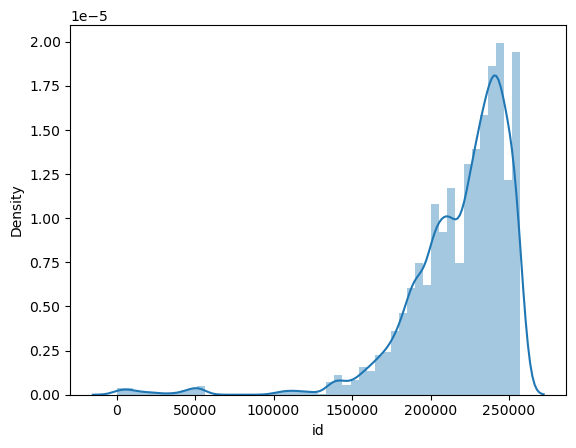

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


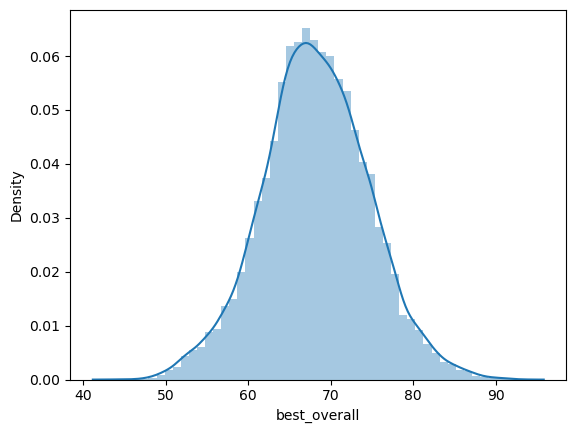

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


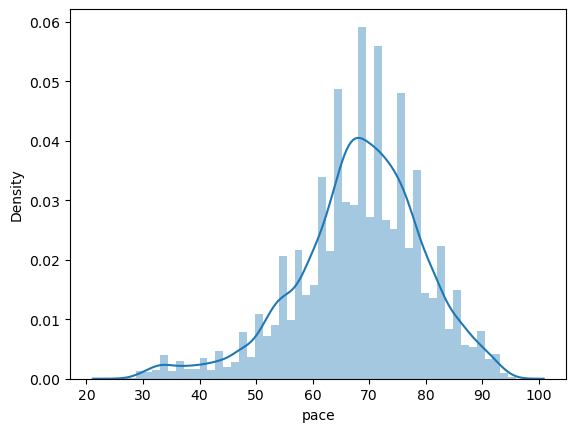

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


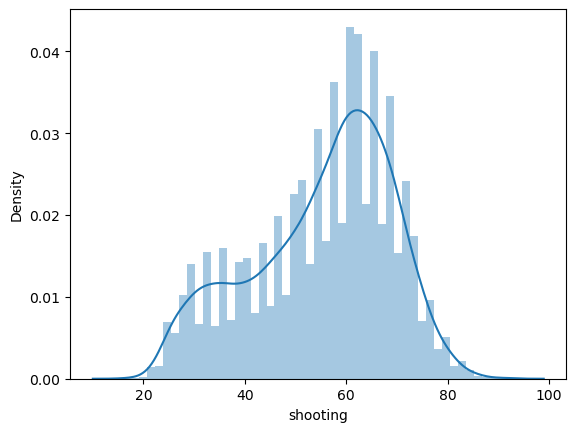

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


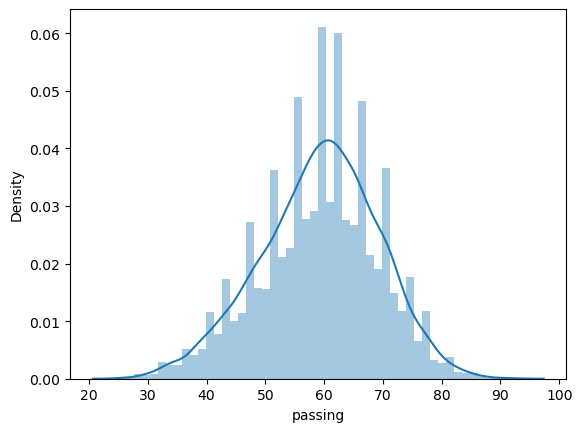

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


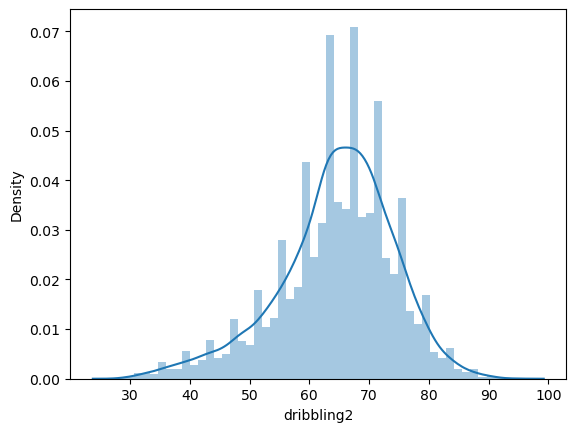

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


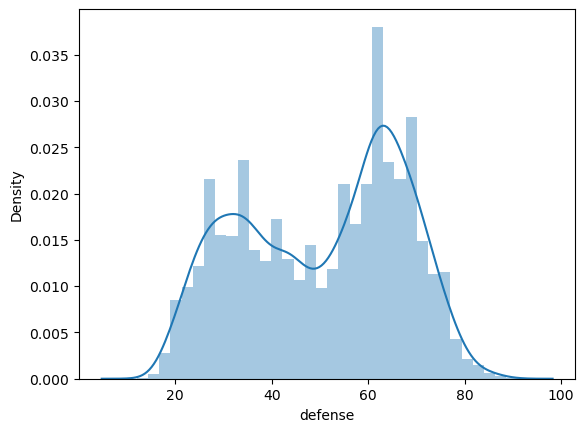

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


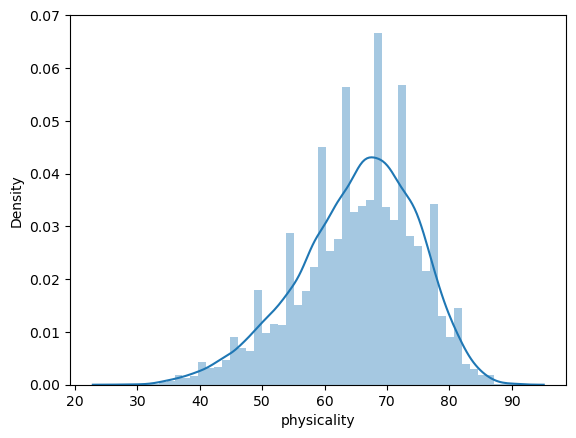

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


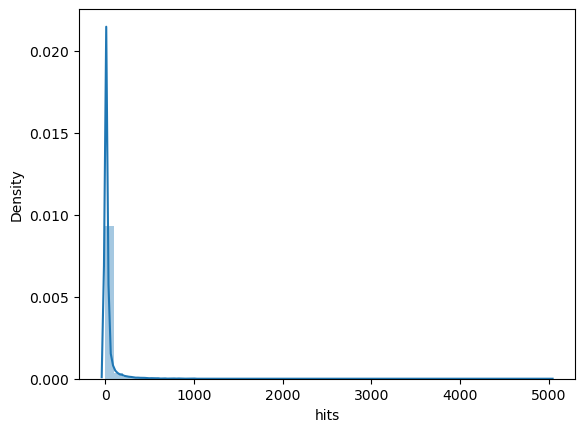

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


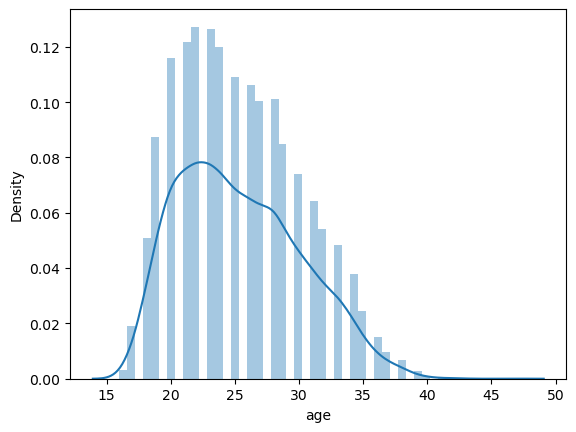

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


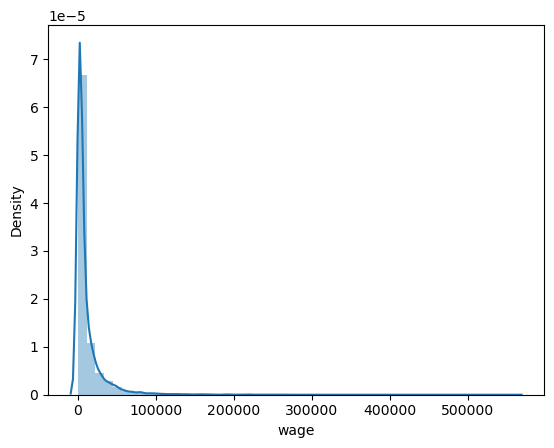

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


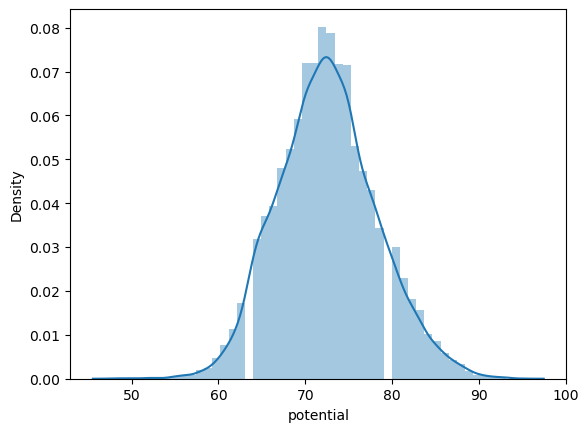

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


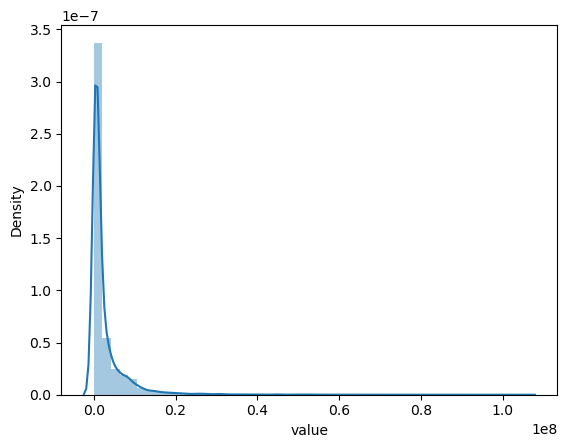

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


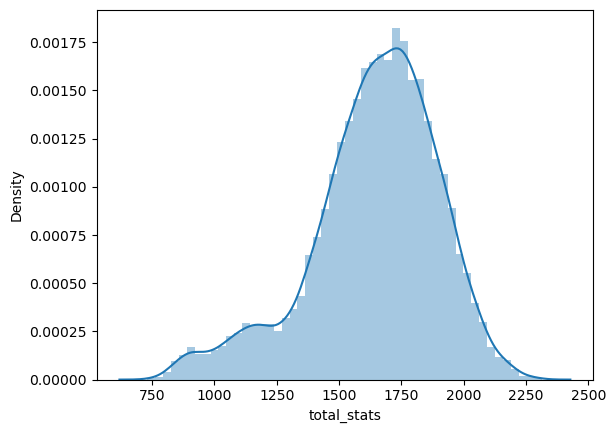

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


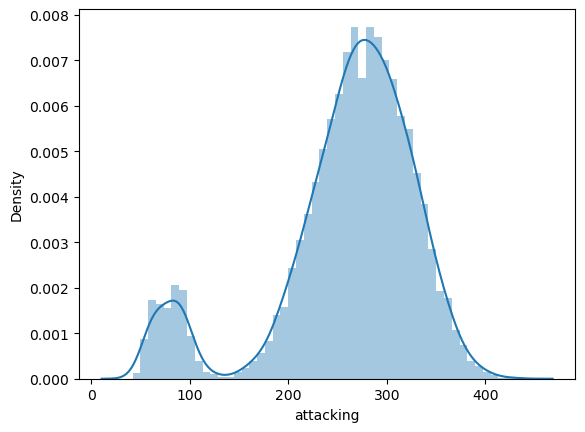

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


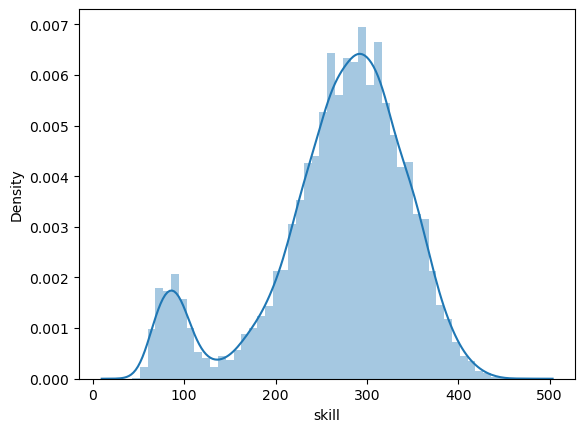

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


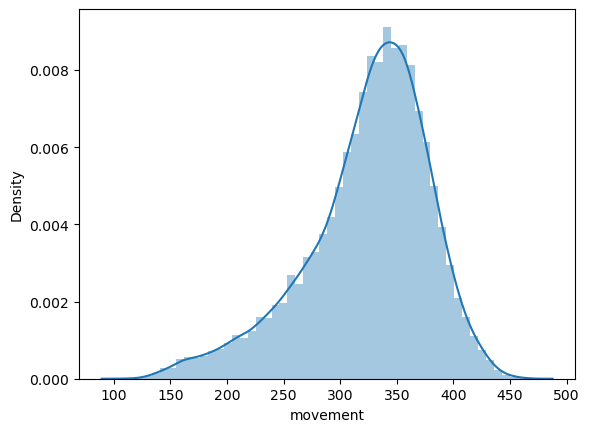

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


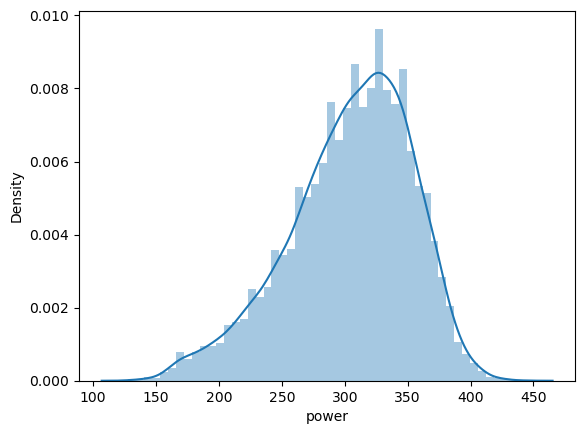

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


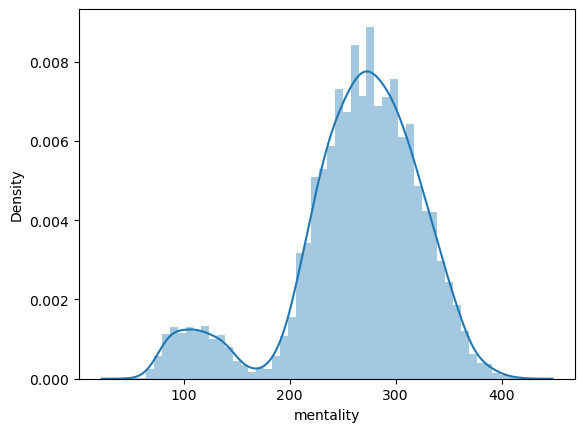

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


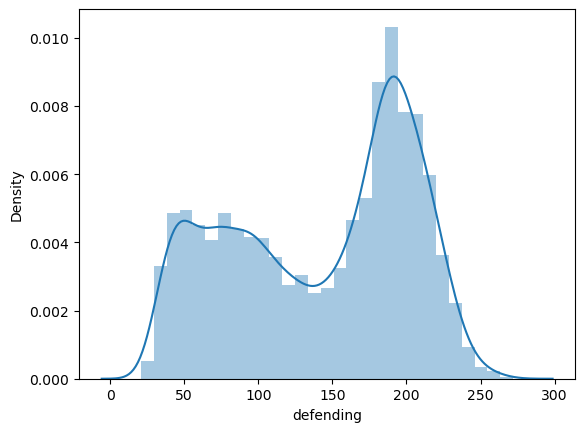

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


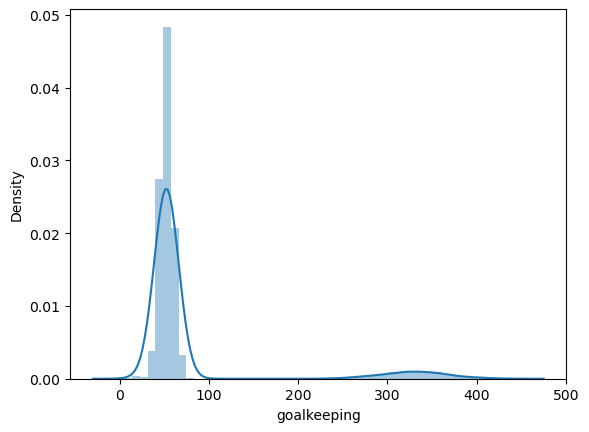

In [61]:
for column in num.columns:
    sns.distplot(num[column])
    plt.show()

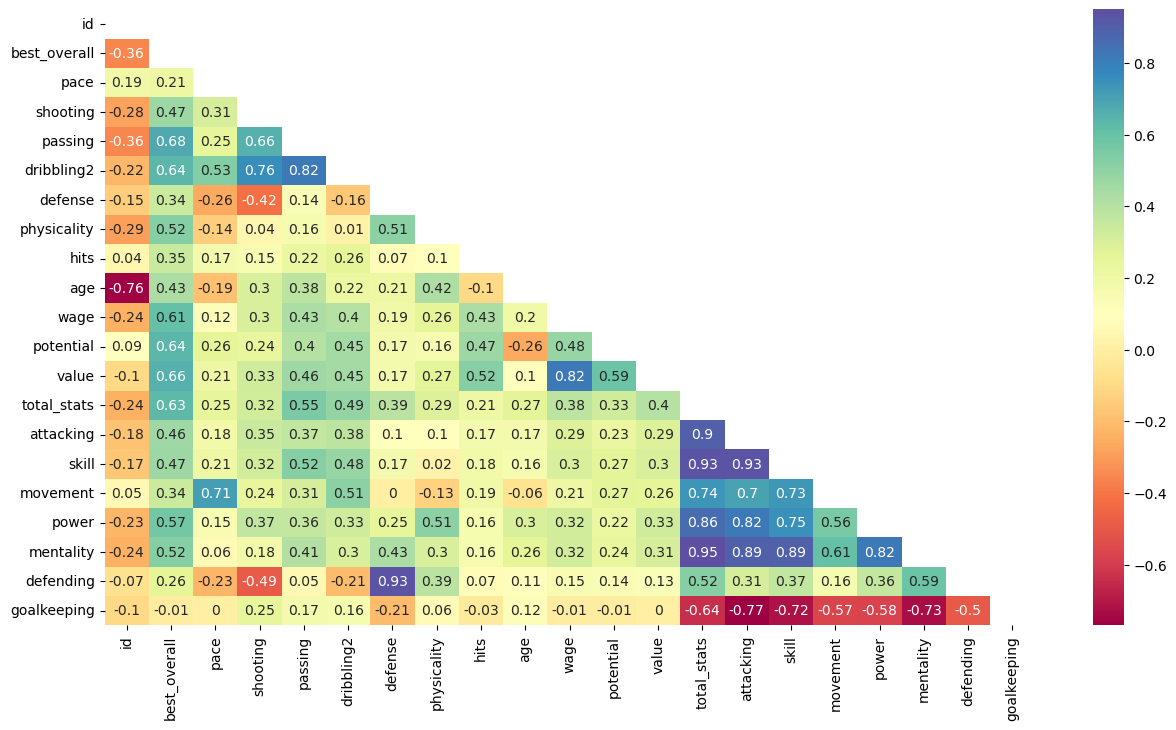

In [62]:
corr = round(num.corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(corr,cmap = 'Spectral', mask = mask, annot = True)
plt.show()

#### **Observations :**
- Since we know the sum of main categories is equal to the total_stats colum, it is not surprising that the variables are highly correlated. What's surprising is how goalkeeping has a negative moderate correlation with total_stats. We will only keep the total_stats column to avoid multicollinearity.
<br/>

- dribbling2 is highly correlated with the passing shooting columns. It also has no correlation with physicality. Since it has the same correlation coefficient with our target value as the passing column, we will be dropping this column.
<br/>

- And of course, we will not be keeping the unique identifier id column for the machine learning model.

In [63]:
num_new = num[['best_overall', 'pace', 'shooting', 'passing','defense', 'physicality', 'hits', 'age', 'wage', 'potential', 'total_stats','value']]

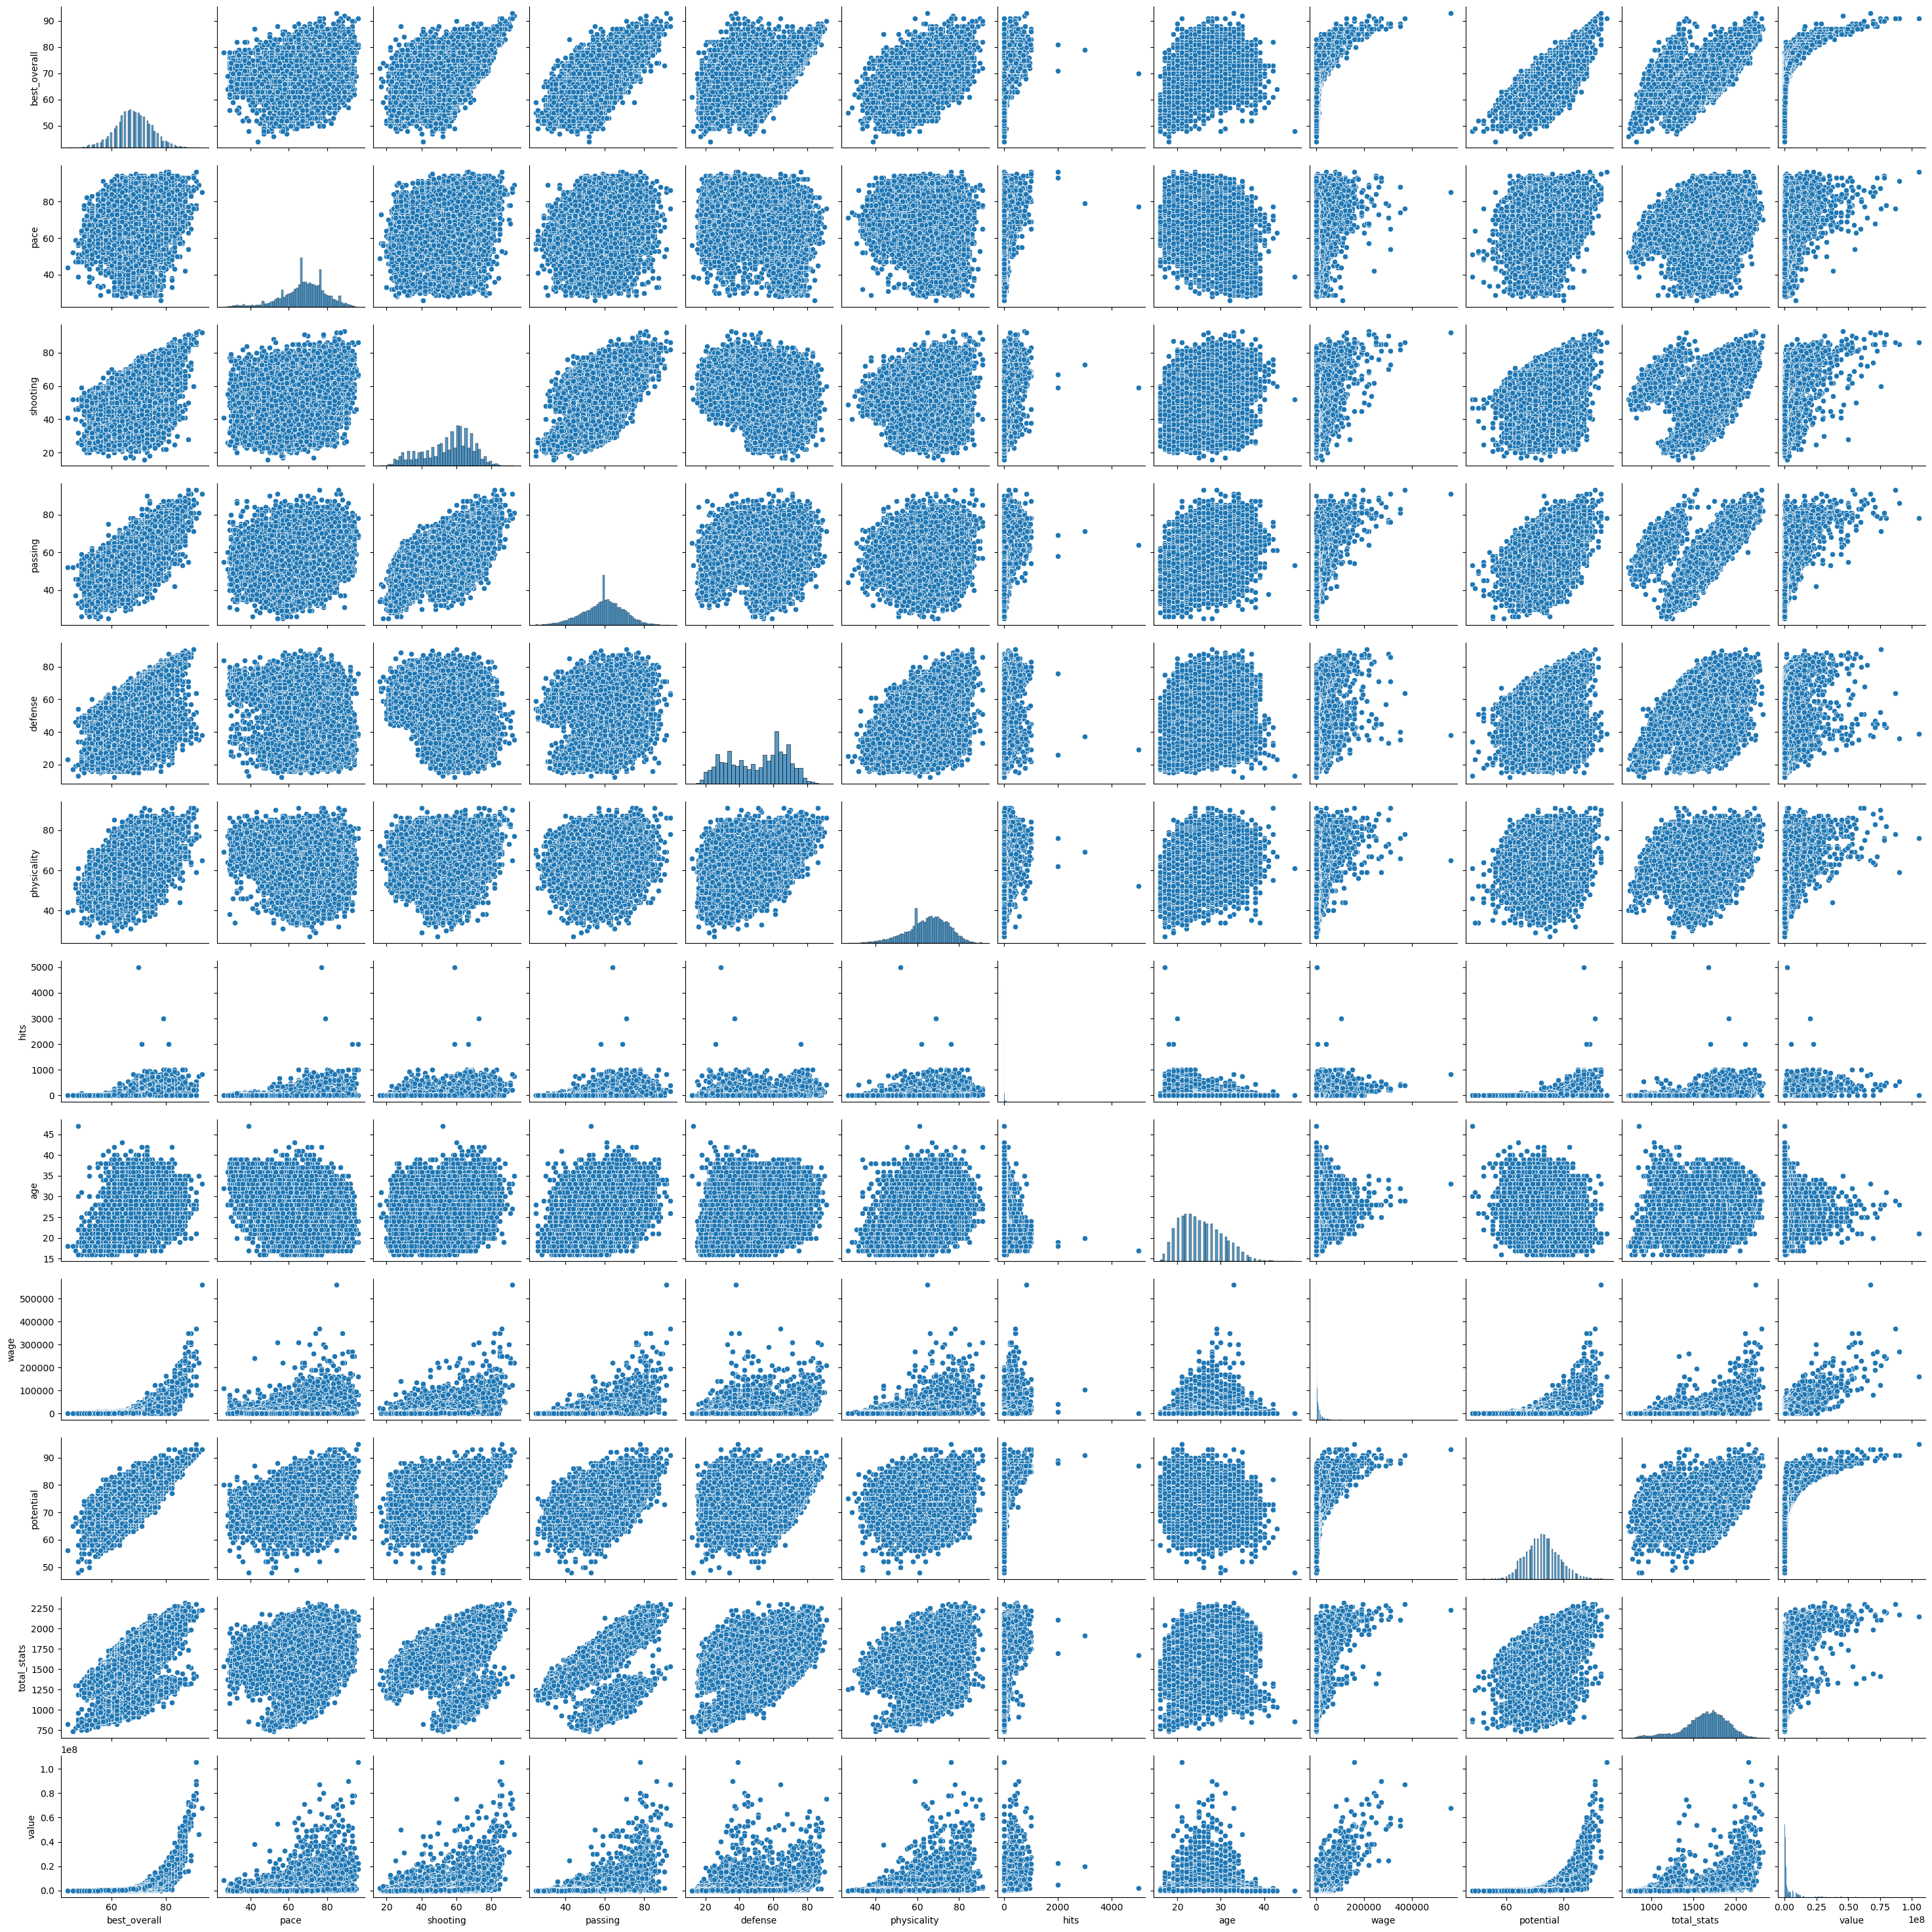

In [64]:
sns.pairplot(num_new)

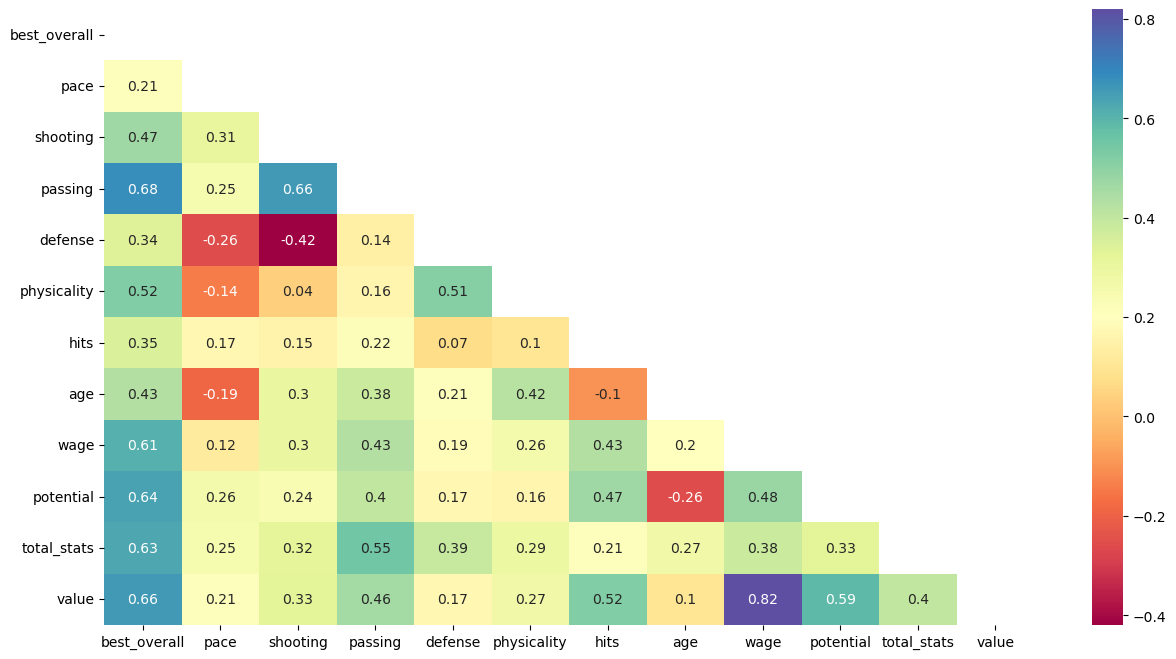

In [65]:
# new heatmap with chosen variables
corr2 = round(num_new.corr(),2)
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(corr2,cmap = 'Spectral', mask = mask, annot = True)
plt.show()

In [66]:
num_new.describe()

best_overall          pace      shooting       passing       defense  \
count  15930.000000  15930.000000  15930.000000  15930.000000  15930.000000   
mean      68.185122     68.195041     55.273258     59.247834     50.551789   
std        6.501327     11.236244     13.807915     10.061146     16.804706   
min       44.000000     26.000000     16.000000     25.000000     12.000000   
25%       64.000000     62.000000     46.000000     53.000000     35.000000   
50%       68.000000     69.000000     58.000000     60.000000     54.000000   
75%       72.000000     76.000000     66.000000     66.000000     65.000000   
max       93.000000     96.000000     93.000000     93.000000     91.000000   

        physicality          hits           age           wage     potential  \
count  15930.000000  15930.000000  15930.000000   15930.000000  15930.000000   
mean      65.230634     31.257320     25.384871   11207.947269     72.541306   
std        9.537114     96.239471      4.799877   21747.847196      5.729409   
min       27.000000      1.100000     16.000000     250.000000     48.000000   
25%       59.000000      4.000000     22.000000    2000.000000     69.000000   
50%       66.000000      7.000000     25.000000    4000.000000     72.000000   
75%       72.000000     19.000000     29.000000   12000.000000     76.000000   
max       91.000000   5000.000000     47.000000  560000.000000     95.000000   

        total_stats         value  
count  15930.000000  1.593000e+04  
mean    1640.709981  2.740512e+06  
std      258.492083  5.530664e+06  
min      731.000000  1.000000e+03  
25%     1505.000000  4.250000e+05  
50%     1670.000000  8.750000e+05  
75%     1818.000000  2.700000e+06  
max     2316.000000  1.055000e+08

### X-y Split before transforming the variables

In [69]:
X = num_new.drop(columns ='value')
y = num_new[['value']]

In [70]:
X.head()

best_overall  pace  shooting  passing  defense  physicality   hits  age  \
0            71    71        59       70       68           69    4.0   33   
1            70    53        69       73       58           63    4.0   37   
2            71    45        68       76       36           52   11.0   33   
4            82    58        70       85       63           59  149.0   36   
5            66    91        56       56       27           63    7.0   27   

      wage  potential  total_stats  
0   7000.0         69         1929  
1   7000.0         71         1906  
2  15000.0         71         1770  
4  12000.0         81         2014  
5   5000.0         70         1649

In [71]:
y.head()

value
0   625000.0
1   600000.0
2  1100000.0
4  5500000.0
5   725000.0

### Copy the numerical variables into X1 and X2 for feature transformation

In [72]:
X_1 = X.copy()
X_2 = X.copy()

In [73]:
X_1.shape

(15930, 11)

#### Normalizing Data

In [74]:
ntransformer = MinMaxScaler().fit(X_1)
x_normalized = ntransformer.transform(X_1)
x_normalized = pd.DataFrame(x_normalized)

In [75]:
x_normalized.shape

(15930, 11)

#### Standerdizing Data

In [76]:
stransformer = StandardScaler().fit(X_2)
x_standarized = stransformer.transform(X_2)
x_standarized = pd.DataFrame(x_standarized)

In [77]:
x_standarized.shape

(15930, 11)

### Categorical Variables

In [78]:
categorical = df_all.select_dtypes(object)
categorical.head()

name              club best_position nationality
0  G. Pasquale           Udinese           LWB       Italy
1  Luis García         KAS Eupen            CM       Spain
2      J. Cole     Coventry City           CAM     England
4      Iniesta       Vissel Kobe           CAM       Spain
5   D. Odonkor  Alemannia Aachen            RW     Germany

In [79]:
categorical.best_position.nunique()

15

In [80]:
cat = categorical.drop(['name', 'club','nationality'], axis=1)
cat.head( )

best_position
0           LWB
1            CM
2           CAM
4           CAM
5            RW

In [81]:
cat.shape

(15930, 1)

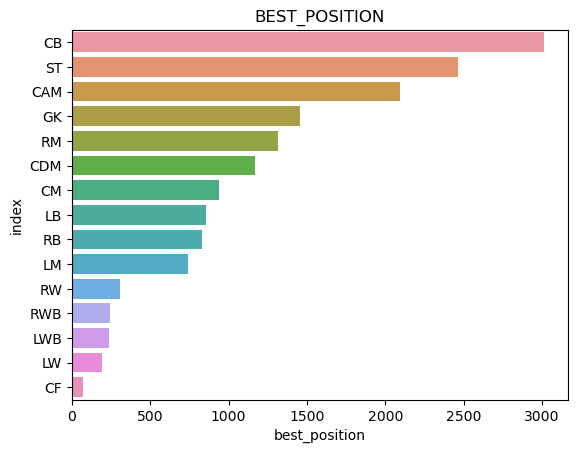

<Figure size 640x480 with 0 Axes>

In [133]:
sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
plt.figure()
print()

### Dummifying categorical columns

In [83]:
cat_dummies = pd.get_dummies(cat).reset_index(drop=True)
cat_dummies.head()

best_position_CAM  best_position_CB  best_position_CDM  best_position_CF  \
0                  0                 0                  0                 0   
1                  0                 0                  0                 0   
2                  1                 0                  0                 0   
3                  1                 0                  0                 0   
4                  0                 0                  0                 0   

   best_position_CM  best_position_GK  best_position_LB  best_position_LM  \
0                 0                 0                 0                 0   
1                 1                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   best_position_LW  best_position_LWB  best_position_RB  best_position_RM  \
0                 0                  1                 0                 0   
1                 0                  0                 0                 0   
2                 0                  0                 0                 0   
3                 0                  0                 0                 0   
4                 0                  0                 0                 0   

   best_position_RW  best_position_RWB  best_position_ST  
0                 0                  0                 0  
1                 0                  0                 0  
2                 0                  0                 0  
3                 0                  0                 0  
4                 1                  0                 0

In [84]:
cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15930 entries, 0 to 15929
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   best_position_CAM  15930 non-null  uint8
 1   best_position_CB   15930 non-null  uint8
 2   best_position_CDM  15930 non-null  uint8
 3   best_position_CF   15930 non-null  uint8
 4   best_position_CM   15930 non-null  uint8
 5   best_position_GK   15930 non-null  uint8
 6   best_position_LB   15930 non-null  uint8
 7   best_position_LM   15930 non-null  uint8
 8   best_position_LW   15930 non-null  uint8
 9   best_position_LWB  15930 non-null  uint8
 10  best_position_RB   15930 non-null  uint8
 11  best_position_RM   15930 non-null  uint8
 12  best_position_RW   15930 non-null  uint8
 13  best_position_RWB  15930 non-null  uint8
 14  best_position_ST   15930 non-null  uint8
dtypes: uint8(15)
memory usage: 233.5 KB


## 4. Machine Learning Model

#### Model 1 : concat with normalized variables

In [85]:
X1 = pd.concat([x_normalized, cat_dummies], axis=1)

X1 = x_normalized

In [86]:
X1.shape

(15930, 26)

In [87]:
# Train-test Split 70/30?
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=123)
print(len(X1_train), len(y1_train))
print(len(X1_test), len(y1_test))

11151 11151
4779 4779


In [88]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X1_train,y1_train)

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [89]:
# Predictions
predict1 = model.predict(X1_test)
predict1[:5]

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-896861.1470254 ],
       [5411948.22162634],
       [5000541.85110001],
       [ 165453.07279472],
       [6881643.18709724]])

#### Model 2 : concat with standardized variables

X2 = x_standarized

In [90]:
X2 = pd.concat([x_standarized, cat_dummies], axis=1)

In [91]:
# Train-test Split 70/30?
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=123)
print(len(X2_train), len(y2_train))
print(len(X2_test), len(y2_test))

11151 11151
4779 4779


In [92]:
# Apply Linear Regression
model.fit(X2_train,y2_train)

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [93]:
# Predictions
predict2 = model.predict(X2_test)
predict2[:5]

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-896861.14702539],
       [5411948.22162632],
       [5000541.85109999],
       [ 165453.07279472],
       [6881643.18709724]])

## 5. Evaluate the Model

### Model 1

In [122]:
y.describe()

value
count  1.593000e+04
mean   2.740512e+06
std    5.530664e+06
min    1.000000e+03
25%    4.250000e+05
50%    8.750000e+05
75%    2.700000e+06
max    1.055000e+08

In [123]:
r2 = r2_score(y1_test, predict1)
adj_r2 = 1 - (1-model.score(X1, y))*(len(y)-1)/(len(y)-X1.shape[1]-1)
RMSE = mean_squared_error(y1_test, predict1, squared=False)
MSE = mean_squared_error(y1_test, predict1)
MAE = mean_absolute_error(y1_test, predict1)
print("R2 = ", r2)
print("Adjusted R2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

R2 =  0.7623228382143097
Adjusted R2 =  0.07232368293671465
RMSE =  2788993.731431903
MSE =  7778486033966.45
MAE =  1438673.7149024694


/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Model 2

In [124]:
r2 = r2_score(y2_test, predict2)
adj_r2 = 1 - (1-model.score(X2, y))*(len(y)-1)/(len(y)-X2.shape[1]-1)
RMSE = mean_squared_error(y2_test, predict2, squared=False)
MSE = mean_squared_error(y2_test, predict2)
MAE = mean_absolute_error(y2_test, predict2)
print("R2 = ", r2)
print("Adjusted R2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

R2 =  0.7623228382143098
Adjusted R2 =  0.7589743618031772
RMSE =  2788993.7314319024
MSE =  7778486033966.446
MAE =  1438673.714902467


/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Standardization is better in terms of dealing with the dataset with outliers.

#### Create dataframe for visualising the differences between real and predicted values

In [125]:
results_norm = pd.DataFrame()
results_norm['true'] = y1_test
results_norm['pred'] = predict1
results_norm['diff'] = results_norm.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results_norm.head()

true          pred          diff
9034    350000.0 -8.968611e+05  1.246861e+06
8318   4100000.0  5.411948e+06  1.311948e+06
7683   3200000.0  5.000542e+06  1.800542e+06
8192    525000.0  1.654531e+05  3.595469e+05
10627  4900000.0  6.881643e+06  1.981643e+06

In [126]:
results_norm.describe()

true          pred          diff
count  4.779000e+03  4.779000e+03  4.779000e+03
mean   2.829376e+06  2.786362e+06  1.438674e+06
std    5.721360e+06  4.633187e+06  2.389539e+06
min    1.000000e+04 -4.129159e+06  6.152536e+02
25%    4.500000e+05  2.663631e+05  3.744133e+05
50%    9.000000e+05  1.556519e+06  8.181179e+05
75%    2.700000e+06  3.765400e+06  1.633625e+06
max    9.000000e+07  6.445178e+07  4.963482e+07

In [128]:
# Check predictions of top 20 players by market value
ranking = results_norm.sort_values('true', ascending=False)
ranking.head(20)

true          pred          diff
2650   90000000.0  5.090775e+07  3.909225e+07
2871   87000000.0  6.445178e+07  2.254822e+07
5030   78000000.0  4.661759e+07  3.138241e+07
4166   75500000.0  4.021237e+07  3.528763e+07
3961   71000000.0  4.181123e+07  2.918877e+07
9633   69500000.0  1.986518e+07  4.963482e+07
9212   60000000.0  2.981431e+07  3.018569e+07
5642   56000000.0  3.723237e+07  1.876763e+07
5256   53500000.0  3.698905e+07  1.651095e+07
7226   51500000.0  2.454333e+07  2.695667e+07
6333   51000000.0  3.600219e+07  1.499781e+07
3171   50000000.0  3.723643e+07  1.276357e+07
3519   50000000.0  2.662922e+07  2.337078e+07
10212  49500000.0  2.221082e+07  2.728918e+07
5627   49500000.0  3.100516e+07  1.849484e+07
7499   49000000.0  2.308884e+07  2.591116e+07
3875   46500000.0  3.991944e+07  6.580556e+06
9265   44500000.0  3.083167e+07  1.366833e+07
5464   41000000.0  3.372436e+07  7.275637e+06
3401   40500000.0  2.124004e+07  1.925996e+07

In [100]:
player = df[['id', 'name', 'club']]
rank = player.merge(ranking, left_on='id', right_index=True).sort_values('true', ascending=False)
rank.head(20)

id            name                  club        true          pred  \
90    7826   R. van Persie             Feyenoord  12000000.0  1.088743e+07   
63    5203       M. Oddo B                 Lecce  12000000.0  8.435140e+06   
35    1615       L. Thuram          FC Barcelona  10500000.0  1.640549e+07   
26    1179       G. Buffon              Juventus   9500000.0  8.302108e+06   
75    5744   E. Gudjohnsen              Molde FK   8000000.0  6.849917e+06   
99    9014       A. Robben          FC Groningen   6000000.0  6.429627e+06   
22    1041      J. Zanetti                 Inter   6000000.0  1.193150e+07   
46    2651        S. Given            Stoke City   5000000.0  7.118805e+06   
17     670            Zulu       Pohang Steelers   3700000.0  4.606406e+06   
29    1198      F. Inzaghi                 Milan   3100000.0  2.554511e+06   
21    1040  Roberto Carlos  FC Anzhi Makhachkala   2300000.0  2.480988e+06   
42    2148     H. Trabelsi       Manchester City   2100000.0  1.467429e+06   
38    1747       G. Coupet   Paris Saint-Germain   1700000.0  2.847883e+06   
84    7142      K. Kaladze                 Genoa   1700000.0  2.022002e+06   
122  13743      S. Gerrard             LA Galaxy   1000000.0  1.798347e+06   
93    8473      T. Rosický          Sparta Praha    950000.0  1.706384e+06   
30    1219      C. Abbiati                 Milan    950000.0  1.830958e+06   
117  13038           Puyol          FC Barcelona    900000.0  1.730969e+06   
33    1256      C. Seedorf              Botafogo    800000.0  2.281386e+06   
69    5479        Casillas              FC Porto    725000.0  1.324348e+06   

             diff  
90   1.112570e+06  
63   3.564860e+06  
35   5.905488e+06  
26   1.197892e+06  
75   1.150083e+06  
99   4.296272e+05  
22   5.931503e+06  
46   2.118805e+06  
17   9.064064e+05  
29   5.454891e+05  
21   1.809881e+05  
42   6.325709e+05  
38   1.147883e+06  
84   3.220016e+05  
122  7.983468e+05  
93   7.563845e+05  
30   8.809578e+05  
117  8.309692e+05  
33   1.481386e+06  
69   5.993485e+05

In [104]:
results_stand = pd.DataFrame()
results_stand['true'] = y2_test
results_stand['pred'] = predict2
results_stand['diff'] = results_stand.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results_stand.head()

true          pred          diff
9034    350000.0 -8.968611e+05  1.246861e+06
8318   4100000.0  5.411948e+06  1.311948e+06
7683   3200000.0  5.000542e+06  1.800542e+06
8192    525000.0  1.654531e+05  3.595469e+05
10627  4900000.0  6.881643e+06  1.981643e+06

In [129]:
results_stand.sort_values('true', ascending=False).head(20)

true          pred          diff
2650   90000000.0  5.090775e+07  3.909225e+07
2871   87000000.0  6.445178e+07  2.254822e+07
5030   78000000.0  4.661759e+07  3.138241e+07
4166   75500000.0  4.021237e+07  3.528763e+07
3961   71000000.0  4.181123e+07  2.918877e+07
9633   69500000.0  1.986518e+07  4.963482e+07
9212   60000000.0  2.981431e+07  3.018569e+07
5642   56000000.0  3.723237e+07  1.876763e+07
5256   53500000.0  3.698905e+07  1.651095e+07
7226   51500000.0  2.454333e+07  2.695667e+07
6333   51000000.0  3.600219e+07  1.499781e+07
3171   50000000.0  3.723643e+07  1.276357e+07
3519   50000000.0  2.662922e+07  2.337078e+07
10212  49500000.0  2.221082e+07  2.728918e+07
5627   49500000.0  3.100516e+07  1.849484e+07
7499   49000000.0  2.308884e+07  2.591116e+07
3875   46500000.0  3.991944e+07  6.580556e+06
9265   44500000.0  3.083167e+07  1.366833e+07
5464   41000000.0  3.372436e+07  7.275637e+06
3401   40500000.0  2.124004e+07  1.925996e+07

In [130]:
# Check predictions of top 20 players by market value
ranking = results_stand.sort_values('true', ascending=False)
ranking.head(20)

true          pred          diff
2650   90000000.0  5.090775e+07  3.909225e+07
2871   87000000.0  6.445178e+07  2.254822e+07
5030   78000000.0  4.661759e+07  3.138241e+07
4166   75500000.0  4.021237e+07  3.528763e+07
3961   71000000.0  4.181123e+07  2.918877e+07
9633   69500000.0  1.986518e+07  4.963482e+07
9212   60000000.0  2.981431e+07  3.018569e+07
5642   56000000.0  3.723237e+07  1.876763e+07
5256   53500000.0  3.698905e+07  1.651095e+07
7226   51500000.0  2.454333e+07  2.695667e+07
6333   51000000.0  3.600219e+07  1.499781e+07
3171   50000000.0  3.723643e+07  1.276357e+07
3519   50000000.0  2.662922e+07  2.337078e+07
10212  49500000.0  2.221082e+07  2.728918e+07
5627   49500000.0  3.100516e+07  1.849484e+07
7499   49000000.0  2.308884e+07  2.591116e+07
3875   46500000.0  3.991944e+07  6.580556e+06
9265   44500000.0  3.083167e+07  1.366833e+07
5464   41000000.0  3.372436e+07  7.275637e+06
3401   40500000.0  2.124004e+07  1.925996e+07

In [131]:
player = df[['id', 'name', 'club']]
rank = player.merge(ranking, left_on='id', right_index=True).sort_values('true', ascending=True)
rank.head(20)

id           name                 club       true          pred  \
8      244  G. Neville  B    Manchester United   220000.0 -9.962138e+05   
7      241       R. Giggs    Manchester United   275000.0 -1.756652e+06   
97    8842     L. Scaloni             Atalanta   300000.0  8.778703e+05   
4       41        Iniesta          Vissel Kobe   325000.0  1.471335e+06   
127  15723        D. Kuyt            Feyenoord   325000.0 -1.114326e+06   
48    2837       R. Delap        Burton Albion   350000.0  1.664769e+04   
94    8517      S. Parker               Fulham   425000.0  5.810991e+05   
120  13732       J. Terry          Aston Villa   450000.0 -7.148956e+05   
45    2492         Eliseu           SL Benfica   475000.0 -4.917845e+05   
39    1845    O. Solskjær    Manchester United   475000.0 -3.673591e+05   
111  11795  A. Stansfield          Exeter City   650000.0  1.727908e+06   
69    5479       Casillas             FC Porto   725000.0  1.324348e+06   
33    1256     C. Seedorf             Botafogo   800000.0  2.281386e+06   
117  13038          Puyol         FC Barcelona   900000.0  1.730969e+06   
93    8473     T. Rosický         Sparta Praha   950000.0  1.706384e+06   
30    1219     C. Abbiati                Milan   950000.0  1.830958e+06   
122  13743     S. Gerrard            LA Galaxy  1000000.0  1.798347e+06   
38    1747      G. Coupet  Paris Saint-Germain  1700000.0  2.847883e+06   
84    7142     K. Kaladze                Genoa  1700000.0  2.022002e+06   
42    2148    H. Trabelsi      Manchester City  2100000.0  1.467429e+06   

             diff  
8    1.216214e+06  
7    2.031652e+06  
97   5.778703e+05  
4    1.146335e+06  
127  1.439326e+06  
48   3.333523e+05  
94   1.560991e+05  
120  1.164896e+06  
45   9.667845e+05  
39   8.423591e+05  
111  1.077908e+06  
69   5.993485e+05  
33   1.481386e+06  
117  8.309692e+05  
93   7.563845e+05  
30   8.809578e+05  
122  7.983468e+05  
38   1.147883e+06  
84   3.220016e+05  
42   6.325709e+05

## 6. Reporting / Visualization

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

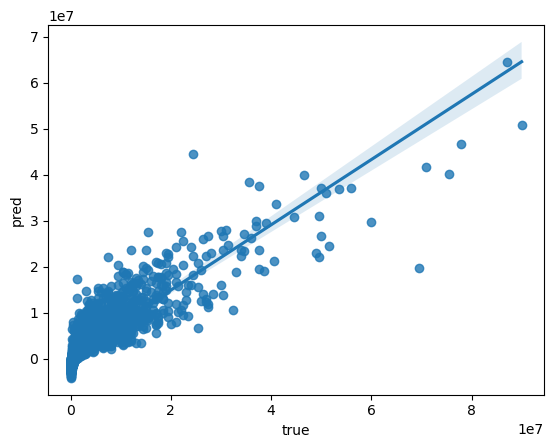

In [108]:
sns.regplot(results_norm['true'], results_norm['pred'])

<AxesSubplot:xlabel='true', ylabel='pred'>

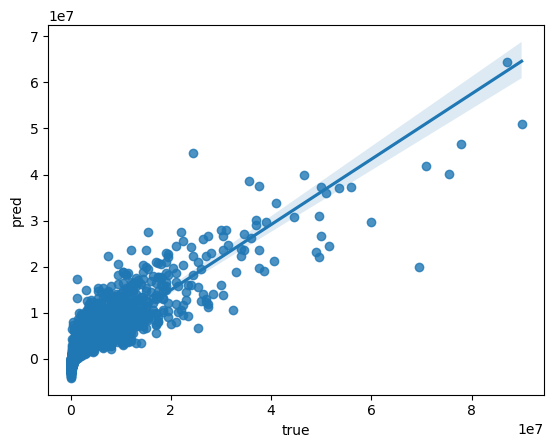

In [109]:
sns.regplot(results_stand['true'], results_stand['pred'])

In [102]:
# show ranking (top 20 players by market value) -- goal

In [58]:
df_all[['name', 'club','best_overall', 'age', 'wage','value']].sort_values('value', ascending=False).head(20)

name                 club  best_overall  age      wage  \
9331            K. Mbappé  Paris Saint-Germain            91   21  160000.0   
2650            Neymar Jr  Paris Saint-Germain            91   28  270000.0   
2871         K. De Bruyne      Manchester City            91   29  370000.0   
2287       R. Lewandowski    FC Bayern München            91   31  240000.0   
5030              S. Mané            Liverpool            90   28  250000.0   
5109             M. Salah            Liverpool            90   28  250000.0   
4166          V. van Dijk            Liverpool            90   28  210000.0   
3665             J. Oblak      Atlético Madrid            91   27  125000.0   
4049          R. Sterling      Manchester City            88   25  270000.0   
5425            P. Dybala             Juventus            89   26  190000.0   
3961              H. Kane    Tottenham Hotspur            88   26  220000.0   
9633            J. Sancho    Borussia Dortmund            89   20   82000.0   
2790        M. ter Stegen         FC Barcelona            90   28  260000.0   
752              L. Messi         FC Barcelona            93   33  560000.0   
5736           J. Kimmich    FC Bayern München            88   25  145000.0   
5633      Bruno Fernandes    Manchester United            88   25  195000.0   
5777              Alisson            Liverpool            90   27  160000.0   
9212  T. Alexander-Arnold            Liverpool            87   21  110000.0   
6605       Bernardo Silva      Manchester City            87   25  230000.0   
3630             Casemiro          Real Madrid            89   28  310000.0   

            value  
9331  105500000.0  
2650   90000000.0  
2871   87000000.0  
2287   80000000.0  
5030   78000000.0  
5109   78000000.0  
4166   75500000.0  
3665   75000000.0  
4049   72500000.0  
5425   71000000.0  
3961   71000000.0  
9633   69500000.0  
2790   69500000.0  
752    67500000.0  
5736   65000000.0  
5633   63000000.0  
5777   62500000.0  
9212   60000000.0  
6605   60000000.0  
3630   59500000.0

### Next steps...

To improve the models: 
- add international rep, away_win, duels_won
- check and deal with the outliers
- try box-cox for variables like best_overall, total_stats and potential which are very skewed to the left.